In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import lars_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import enet_path
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [14]:
X = np.random.uniform(low=-0.5, high=0.5, size=(30,23))
#X = np.random.normal(loc=0, scale=1, size=(30,23))

s = np.ones((30,1))

error = 0#np.random.rand()
error_corr = 0.01 * error

group1 = np.ones((30,9))
group2 = np.ones((30,9))
group3 = np.ones((30,9))

for row in range(group1.shape[0]):
    for column in range(group1.shape[1]):
        group1[row][column] *= X[row][0]
        group1[row][column] += error_corr
        
for row in range(group2.shape[0]):
    for column in range(group2.shape[1]):
        group2[row][column] *= X[row][1]
        group2[row][column] += error_corr
        
for row in range(group3.shape[0]):
    for column in range(group3.shape[1]):
        group3[row][column] *= X[row][2]
        group3[row][column] += error_corr

print(group1.shape)
X_data = np.insert(X, [1], group1, axis=1)
X_data = np.insert(X_data, [11], group2, axis=1)
X_data = np.insert(X_data, [21], group3, axis=1)

print(X_data.shape)

beta = np.zeros((23,1))
beta[0] = 1
beta[1] = 1
beta[2] = 1
#beta[1] = beta[2] = beta[3] = beta[4] = beta[5] = beta[6] = beta[7] = beta[8] = beta[9] = 1
#beta[19] = beta[11] = beta[12] = beta[13] = beta[14] = beta[15] = beta[16] = beta[17] = beta[18] = 1
#beta[21] = beta[22] = beta[23] = beta[24] = beta[25] = beta[26] = beta[27] = beta[28] = beta[29] = 1


print(beta.shape)
print(X.shape)
y = np.sign((X.dot(beta)) + error)

(30, 9)
(30, 50)
(23, 1)
(30, 23)


In [15]:
df = pd.DataFrame(X_data)

dfy = pd.DataFrame(y)
#df3 = pd.concat([df,dfy], axis=1)
#df3.sample(10)

df['output'] = y
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,output
13,-0.356434,-0.356434,-0.356434,-0.356434,-0.356434,-0.356434,-0.356434,-0.356434,-0.356434,-0.356434,...,0.354833,-0.410577,0.495600,0.074046,0.291833,-0.386032,0.133696,-0.169988,-0.276339,-1.0
12,0.289684,0.289684,0.289684,0.289684,0.289684,0.289684,0.289684,0.289684,0.289684,0.289684,...,0.270258,0.258526,0.178539,0.114650,-0.382193,-0.210953,0.088547,0.454234,0.218999,1.0
19,0.290391,0.290391,0.290391,0.290391,0.290391,0.290391,0.290391,0.290391,0.290391,0.290391,...,0.303937,-0.110405,-0.458394,-0.009531,-0.281984,0.055539,-0.361615,0.389863,0.151925,1.0
7,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,...,-0.263039,-0.345055,-0.374842,0.001382,0.075003,-0.285217,0.359955,0.373985,0.331310,-1.0
28,-0.290745,-0.290745,-0.290745,-0.290745,-0.290745,-0.290745,-0.290745,-0.290745,-0.290745,-0.290745,...,0.139335,0.232174,-0.197453,-0.458588,-0.162708,-0.462160,-0.493984,0.049475,-0.022284,-1.0
9,0.087897,0.087897,0.087897,0.087897,0.087897,0.087897,0.087897,0.087897,0.087897,0.087897,...,0.484173,-0.459414,-0.426086,0.327625,-0.099301,0.038788,0.232743,-0.420709,0.279758,-1.0
27,-0.084060,-0.084060,-0.084060,-0.084060,-0.084060,-0.084060,-0.084060,-0.084060,-0.084060,-0.084060,...,-0.064204,0.381617,0.077697,-0.043766,0.446826,0.000379,-0.494198,-0.178590,-0.276155,-1.0
16,-0.009104,-0.009104,-0.009104,-0.009104,-0.009104,-0.009104,-0.009104,-0.009104,-0.009104,-0.009104,...,-0.160374,0.394125,0.015906,0.047921,0.486431,0.064664,-0.329898,-0.289865,-0.297203,1.0
4,-0.226377,-0.226377,-0.226377,-0.226377,-0.226377,-0.226377,-0.226377,-0.226377,-0.226377,-0.226377,...,0.140731,-0.294165,0.276435,-0.064494,0.119545,-0.251370,0.293520,-0.467191,-0.287620,-1.0
3,0.244160,0.244160,0.244160,0.244160,0.244160,0.244160,0.244160,0.244160,0.244160,0.244160,...,0.413640,-0.060446,-0.378811,0.022259,-0.065107,0.406857,-0.166560,-0.465043,-0.135330,1.0


In [16]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,output
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.006168,0.006168,0.006168,0.006168,0.006168,0.006168,0.006168,0.006168,0.006168,0.006168,...,0.014892,0.036538,0.024090,0.009861,-0.011308,-0.014195,-0.065023,-0.059924,-0.078856,-0.066667
std,0.274972,0.274972,0.274972,0.274972,0.274972,0.274972,0.274972,0.274972,0.274972,0.274972,...,0.310408,0.341072,0.304340,0.221807,0.275421,0.281980,0.304218,0.330127,0.272495,1.014833
min,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,-0.433381,...,-0.488060,-0.483343,-0.464888,-0.458588,-0.495792,-0.494210,-0.494198,-0.490446,-0.498704,-1.000000
25%,-0.252434,-0.252434,-0.252434,-0.252434,-0.252434,-0.252434,-0.252434,-0.252434,-0.252434,-0.252434,...,-0.266283,-0.281489,-0.222737,-0.158291,-0.228755,-0.210580,-0.356213,-0.392640,-0.284799,-1.000000
50%,0.031933,0.031933,0.031933,0.031933,0.031933,0.031933,0.031933,0.031933,0.031933,0.031933,...,0.089799,0.135541,0.045175,0.002578,-0.053168,0.001062,-0.061850,-0.103033,-0.099679,-1.000000
75%,0.243389,0.243389,0.243389,0.243389,0.243389,0.243389,0.243389,0.243389,0.243389,0.243389,...,0.268618,0.342330,0.274249,0.150449,0.149815,0.184000,0.198857,0.280156,0.125938,1.000000
max,0.468104,0.468104,0.468104,0.468104,0.468104,0.468104,0.468104,0.468104,0.468104,0.468104,...,0.484173,0.483970,0.495600,0.386076,0.486431,0.439560,0.480943,0.480074,0.477107,1.000000


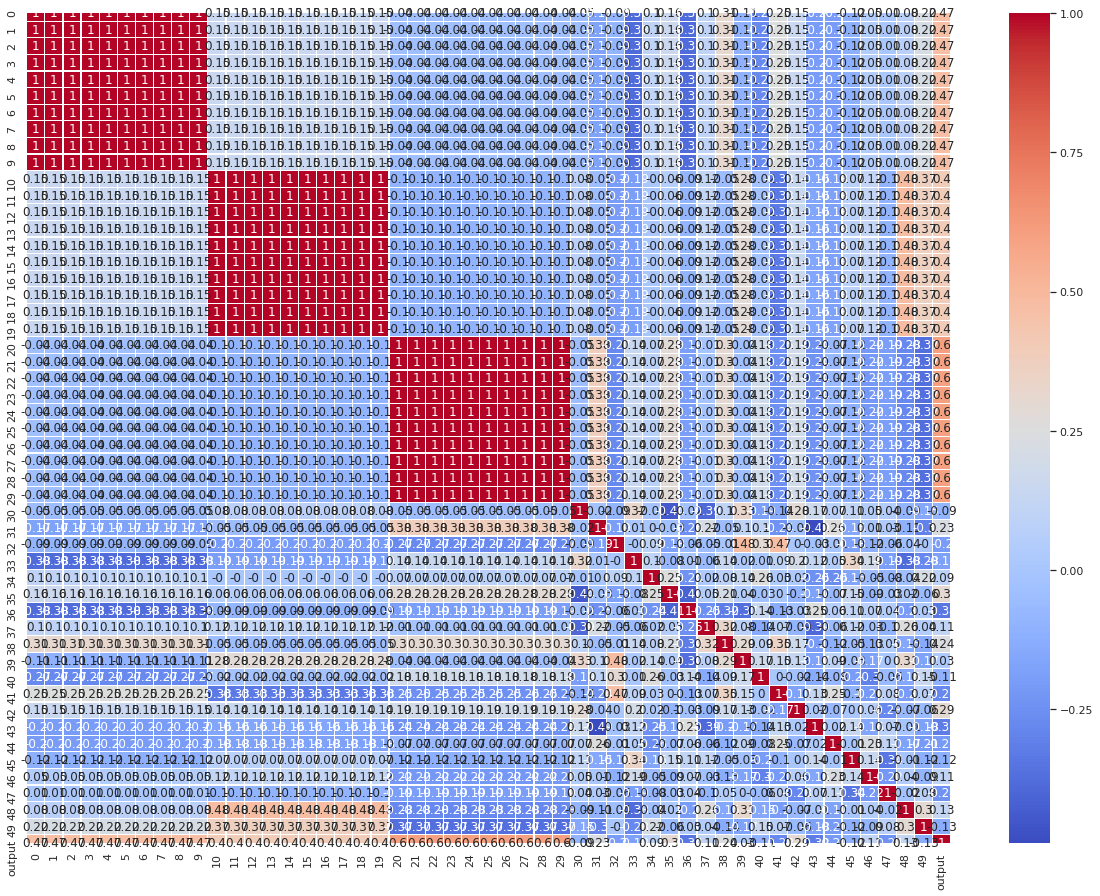

In [17]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=.2, annot=True)

In [18]:
def alphal1ratio_to_taumu(alpha, l1_ratio):
    tau = alpha*l1_ratio
    mu = (tau - alpha) / 2
    
    return tau, mu

def taumu_to_alphal1ratio(tau, mu):
    alpha = 2*mu + tau
    l1_ratio = tau/alpha
    return alpha, l1_ratio

In [21]:
mu = 0
#taus = np.logspace(-1,-4,5)
taus = np.linspace(0.1,0.5,10)

alphas = []
l1_ratios = []

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)
    
#alphas = np.linspace(1,10,20)
#alphas = np.linspace(0.0001,0.9999,20)
#l1_ratios = np.linspace(0.0001,0.9999,20)

print(alphas)
print(l1_ratios)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data,y)
for train_index, test_index in kf.split(X_data, y):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))
print(max_score_index)
print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

print("Performace")
print(scores[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

max_score_index

[0.1, 0.14444444444444446, 0.18888888888888888, 0.23333333333333334, 0.2777777777777778, 0.32222222222222224, 0.3666666666666667, 0.4111111111111111, 0.4555555555555556, 0.5]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[ 3.45154156e-01  1.60934908e-16  1.60934908e-16  1.60934908e-16
  1.60934908e-16  1.60934908e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.38374646e-02  1.29624072e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.64522311e-01  4.25898314e-16  6.38847472e-16  2.12949157e-16
  2.12949157e-16  2.12949157e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  7.89608325e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00]
[ 1.41430743e-02  3.19448545e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0000

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(array([2]),)

In [12]:
params = best_params[max_score_index[0][0]]
alpha = params['alpha']
l1_ratio = params['l1_ratio']

tau, mu = alphal1ratio_to_taumu(alpha, l1_ratio)

mu

0.0

In [13]:
mu = 0.2
#taus = np.logspace(-1,-4,5)
taus = np.linspace(0.1,0.5,10)

alphas = []
l1_ratios = []

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)
    
#alphas = np.linspace(1,10,20)
#alphas = np.linspace(0.0001,0.9999,20)
#l1_ratios = np.linspace(0.0001,0.9999,20)

print(alphas)
print(l1_ratios)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data,y)
for train_index, test_index in kf.split(X_data, y):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))

print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

print("Performace")
print(scores[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

max_score_index

[0.5, 0.5444444444444445, 0.5888888888888889, 0.6333333333333333, 0.6777777777777778, 0.7222222222222223, 0.7666666666666667, 0.8111111111111111, 0.8555555555555556, 0.9]
[0.2, 0.2653061224489796, 0.32075471698113206, 0.368421052631579, 0.4098360655737705, 0.4461538461538461, 0.4782608695652174, 0.5068493150684932, 0.5324675324675325, 0.5555555555555556]
[ 0.06979994  0.06979997  0.06979954  0.06979883  0.06979808  0.06979746
  0.06979711  0.06979707  0.06979728  0.06979766  0.01847463  0.01847461
  0.0184746   0.01847459  0.01847459  0.0184746   0.01847462  0.01847463
  0.01847465  0.01847467 -0.          0.00684225  0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.          0.         -0.         -0.         -0.        ]
[ 0.07910626  0.07910657  0.07910639  0.07910585  0.07910515  0.07910449
  0.07910401  0.07910379  0.07910384  0.07910409  0.02197816  0.02197805
  0.02197796  0.02197

(array([0]),)

In [80]:
def pearson_correlation(x, y):
    corr, _ = pearsonr(x, y)
    return corr

In [ ]:
corr = pairwise_kernels(minimal_dataset.values.T, maximal_dataset.values.T, metric=pearson_correlation)
print(corr.shape)

In [59]:
X, y = make_classification(n_samples=30, n_features=23, n_informative=2)

In [60]:
df = pd.DataFrame(X)
df['output'] = y
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,output
3,-0.626179,0.585431,-3.584585,-0.314278,-1.298520,-0.251538,2.434287,-0.053607,0.999165,-3.741097,...,0.696612,-2.126502,-3.595787,1.294968,1.275375,-0.323322,0.761739,0.469973,-0.722538,1
29,1.176680,-0.649611,2.120400,-0.987468,0.009384,1.702403,-0.334821,1.061233,1.020379,1.057547,...,-1.734283,-1.346481,1.061180,-0.089994,-0.318762,0.955344,0.824414,0.703085,-0.104876,0
22,3.534682,0.855732,0.210935,-1.487591,0.274595,1.458690,0.806825,-0.077211,0.639553,-1.871297,...,-0.490762,-0.951162,-1.850598,-0.836247,0.735080,1.214847,-1.730622,0.177009,0.210839,1
8,-1.527098,0.984076,-1.667283,-0.808467,-1.107328,0.331181,-1.669443,0.988326,-1.126907,1.243653,...,-1.314430,0.661726,1.086492,-1.077082,1.356585,0.819514,0.330856,0.627309,-0.872034,1
1,-0.195533,2.434543,-0.584901,-1.445995,-1.918948,-0.591719,-2.570726,0.864905,-2.449573,1.038037,...,-1.378256,-0.707063,0.757879,-1.070108,1.152114,0.499171,-0.393451,-0.102678,0.763932,0
12,-0.346154,-1.532753,0.226314,0.161721,0.122038,0.955116,2.282719,0.252745,0.891381,-1.521926,...,-0.223781,-1.204512,-1.299262,0.966986,0.226743,0.082740,-1.278122,-0.791849,0.187455,0
24,0.776686,1.746919,0.251142,-0.667428,1.758574,-1.392851,-0.885261,-0.328489,-3.476697,-0.509415,...,-0.852290,1.567734,-0.643599,0.036395,0.506940,0.323758,-0.932881,-0.616532,0.060231,1
18,-0.713255,-2.238520,0.468798,-1.131274,-0.404493,0.448500,1.179225,-0.496517,-0.463630,0.594144,...,0.381432,0.837841,0.769214,0.630334,0.280654,0.540525,-0.887070,0.223330,-1.804104,0
0,2.559787,0.400345,0.008402,-1.446324,-0.336567,1.969354,1.399428,-0.444276,1.799034,-2.211555,...,-0.135113,-1.931412,-2.130666,-1.015714,-1.122450,-0.575026,-1.026415,0.428751,-0.763515,1
16,-0.386248,1.892747,-1.462185,-1.242853,-0.059352,-1.952448,-2.233621,0.382928,-0.491902,1.114256,...,1.339993,0.578541,0.880073,1.918513,0.094926,0.729279,-0.683235,0.857888,1.425648,1


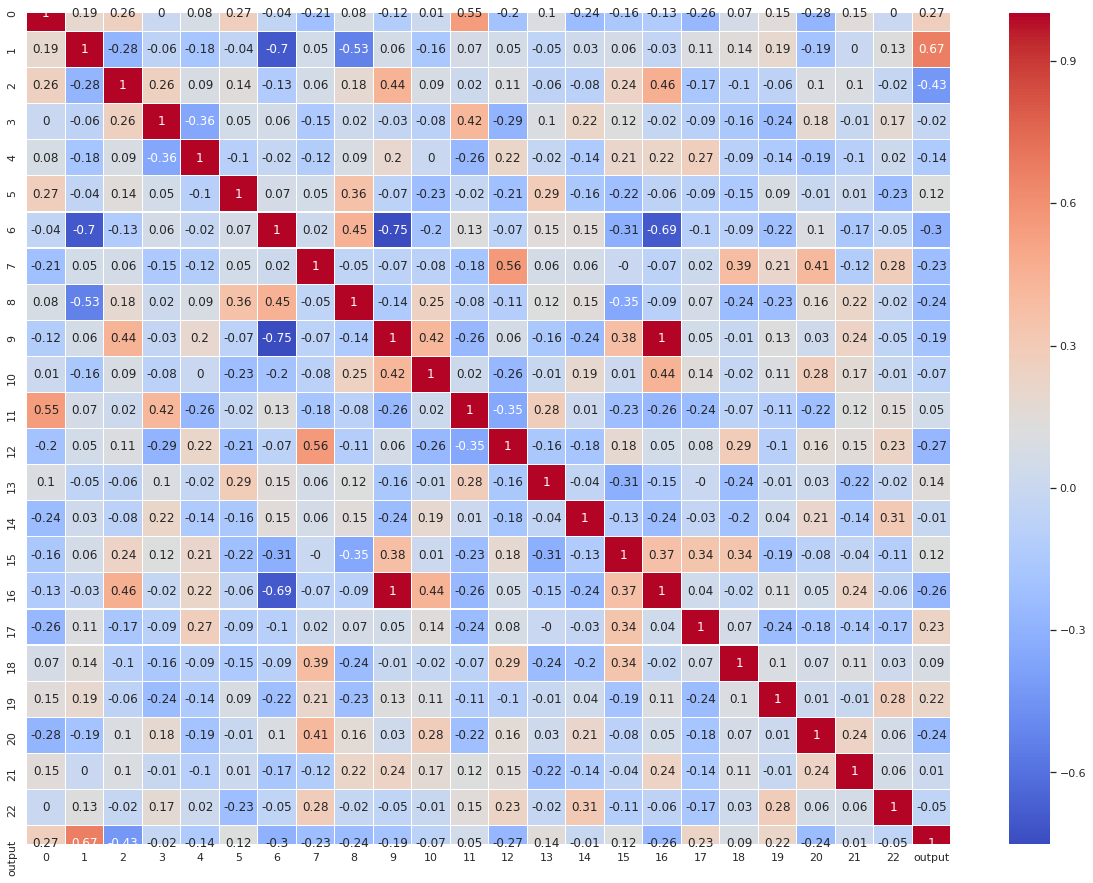

In [61]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=.2, annot=True)

In [23]:
error = np.random.rand()
error_corr = 0.01 * error

group1 = np.ones((30,9))
group2 = np.ones((30,9))
#group3 = np.ones((30,9))

for row in range(group1.shape[0]):
    for column in range(group1.shape[1]):
        group1[row][column] *= X[row][10]
        group1[row][column] += error_corr
        
for row in range(group2.shape[0]):
    for column in range(group2.shape[1]):
        group2[row][column] *= X[row][16]
        group2[row][column] += error_corr
        
#for row in range(group3.shape[0]):
 #   for column in range(group3.shape[1]):
  #      group3[row][column] *= X[row][2]
   #     group3[row][column] += error_corr

print(group1.shape)
X_data = np.insert(X, [11], group1, axis=1)
X_data = np.insert(X_data, [26], group2, axis=1)
#X_data = np.insert(X_data, [21], group3, axis=1)

print(X_data.shape)

(30, 9)
(30, 41)


In [24]:
df = pd.DataFrame(X_data)
df['output'] = y
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,output
1,-1.526333,-1.828410,-0.988960,-1.349380,0.641215,-1.333688,-0.051613,-0.527521,-1.228433,-0.553683,...,0.756828,0.756828,0.756828,-1.155793,0.526215,-0.378124,-0.375697,-0.754763,2.135918,0
26,-0.140761,-0.264049,1.223602,0.623667,0.651775,-0.315730,-0.734669,0.390378,1.309727,-1.274500,...,-1.252586,-1.252586,-1.252586,0.823517,0.407763,-1.215056,-0.898546,1.224416,1.345732,1
17,-0.271062,-0.477753,-0.171667,0.427349,0.099904,-0.536954,-1.278240,0.765400,-1.253316,-1.406577,...,1.335328,1.335328,1.335328,1.460805,-0.379333,0.683630,-0.990776,0.101964,0.140023,1
19,-1.495934,1.126395,-0.622730,-1.200669,-1.515714,1.028013,-0.576640,-1.121941,-0.198093,1.021811,...,1.136065,1.136065,1.136065,-0.402465,2.940147,-0.114483,0.717361,-0.300029,0.229551,0
16,-1.984584,-2.117198,-0.641345,-0.540078,0.713310,-1.101789,0.030124,-1.434481,-1.213259,1.051216,...,-0.660129,-0.660129,-0.660129,-0.761912,0.050237,-0.795736,0.715690,-0.437967,0.182609,1
9,-0.053520,-1.604825,-0.334366,0.751635,0.511322,1.140899,-0.253343,-1.156930,-0.332312,0.760522,...,-0.485441,-0.485441,-0.485441,0.424352,-1.579001,0.959133,0.508411,0.667577,1.250130,1
12,-2.021401,-0.336743,0.581901,-0.047548,-0.217713,-0.718454,0.821831,-0.393928,-0.104181,-1.221005,...,-1.480425,-1.480425,-1.480425,-0.924562,2.083065,0.770927,-0.863287,1.028596,-0.545092,1
15,-0.894554,-0.991214,1.618468,0.143492,-0.633363,0.385357,-1.016854,0.640038,0.748385,-0.942926,...,-0.686461,-0.686461,-0.686461,-0.258181,0.386592,-0.498332,-0.634201,0.257670,0.192350,0
11,1.478594,-0.023814,-1.452447,1.135126,1.873179,-1.418653,1.126994,-0.949401,0.330800,-0.229496,...,2.586810,2.586810,2.586810,1.235317,0.382990,-0.558662,-0.170974,-0.497484,-1.098427,1
4,-0.044725,-0.272267,2.619670,-0.306695,0.161024,0.530056,-1.508404,-0.156213,0.454039,1.109867,...,-0.264268,-0.264268,-0.264268,0.388862,-1.309524,0.243213,0.780889,0.433673,-1.145399,0


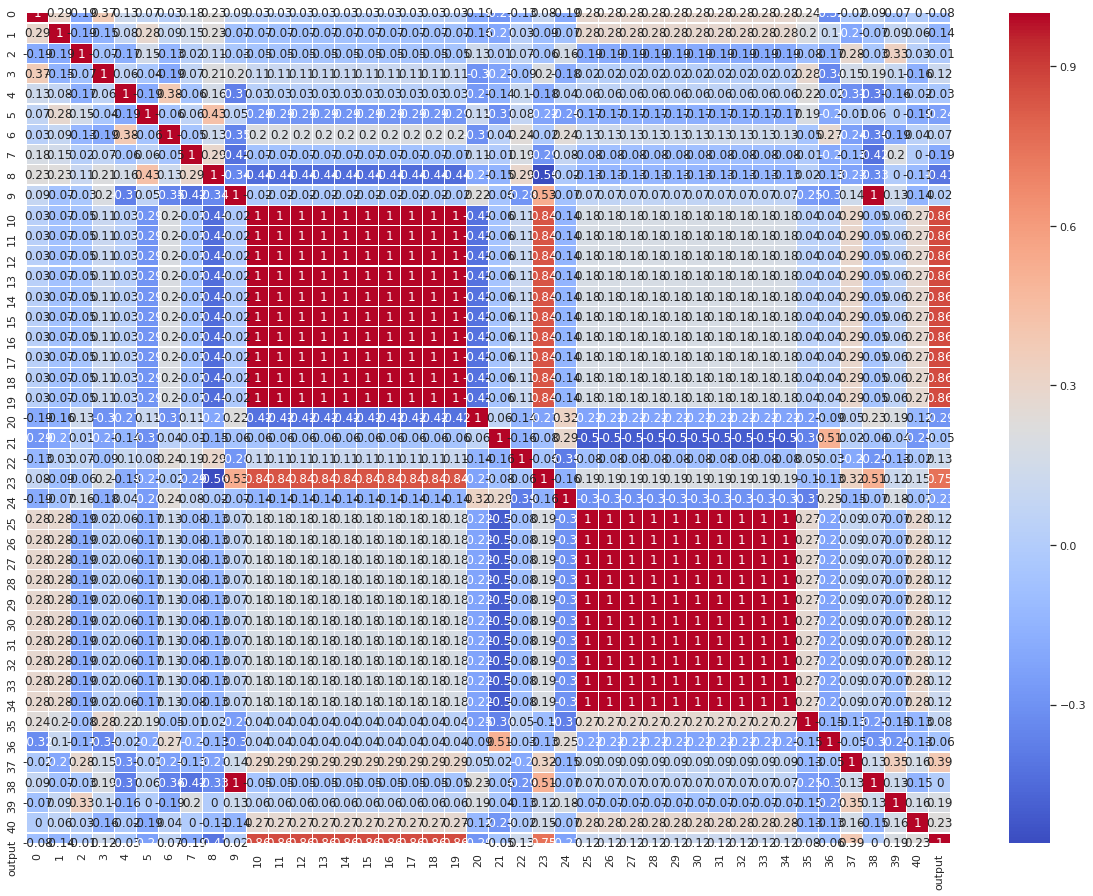

In [25]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=.2, annot=True)

In [19]:
mu = 0
taus = np.logspace(-1,-4,5)
#taus = np.linspace(0.1,0.5,10)

alphas = []
l1_ratios = []

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)

print(alphas)
print(l1_ratios)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data,y)
for train_index, test_index in kf.split(X_data, y):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))
print(max_score_index)
print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

print("Performace")
print(scores[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

max_score_index

[0.1, 0.01778279410038923, 0.0031622776601683794, 0.0005623413251903491, 0.0001]
[1.0, 1.0, 1.0, 1.0, 1.0]


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017707014451116363, tolerance: 0.00039375
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017707014451116363, tolerance: 0.00039375
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017707014451116363, tolerance: 0.00039375
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_des

[-0.          0.         -0.          0.         -0.         -0.
 -0.          0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.02342746 -0.         -0.
  0.          0.30722912  0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01511278
 -0.         -0.          0.         -0.          0.        ]


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005315203615664059, tolerance: 0.00039375
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005295287094142648, tolerance: 0.0004
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005315203615664059, tolerance: 0.00039375
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016050885343938956, tolerance: 0.00039375
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023927572015619426, tolerance: 0.0004
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010005771374545676, tolerance: 0.00039375
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent

[-0.          0.          0.          0.         -0.          0.
 -0.          0.         -0.01480544  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.10073349 -0.          0.
 -0.          0.17553811  0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.          0.          0.          0.06163814]
[-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.03882618e-01  8.98346495e-17  1.49724416e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001048656253468523, tolerance: 0.000375
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032804266995553463, tolerance: 0.00039375
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001048656253468523, tolerance: 0.000375
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.p

(array([2]),)

In [32]:
mu = 0.4
#taus = np.logspace(-1,-4,5)
taus = np.linspace(0.1,0.5,10)

alphas = []
l1_ratios = []

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)
    
#alphas = np.linspace(1,10,20)
#alphas = np.linspace(0.0001,0.9999,20)
#l1_ratios = np.linspace(0.0001,0.9999,20)

print(alphas)
print(l1_ratios)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data,y)
for train_index, test_index in kf.split(X_data, y):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))

print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

print("Performace")
print(scores[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

max_score_index

[0.9, 0.9444444444444445, 0.9888888888888889, 1.0333333333333334, 1.077777777777778, 1.1222222222222222, 1.1666666666666667, 1.2111111111111112, 1.2555555555555555, 1.3]
[0.11111111111111112, 0.15294117647058825, 0.19101123595505617, 0.22580645161290322, 0.25773195876288657, 0.28712871287128716, 0.3142857142857143, 0.33944954128440363, 0.3628318584070797, 0.3846153846153846]
[ 0.          0.         -0.          0.02839138  0.0283924   0.02839144
  0.02838891  0.02838566  0.02838271  0.02838093  0.02838078  0.02838223
  0.02838474 -0.         -0.         -0.          0.00955195  0.00955135
  0.00955143  0.00955212  0.0095532   0.00955438  0.00955537  0.00955594
  0.00955598  0.00955553 -0.          0.          0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
  0.         -0.         -0.          0.          0.        ]
[ 0.          0.         -0.          0.02896841  0.02896843  0.02896927
  0.02897071  0.02897244  0.02897408  0.02897529  0.02897582  0.0

(array([0]),)

In [2]:
n = 30
d_rel = 3
d_dummy = 23

X, y, coef = make_regression(n_samples=n, n_features=d_dummy, n_informative=d_rel, coef=True)

In [3]:
df = pd.DataFrame(X)
df['output'] = y
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,output
0,-0.845506,2.934527,1.364130,1.761765,-1.021686,-0.917474,-1.637572,-0.929404,1.921475,0.181407,...,-0.211797,1.346268,-1.214701,-0.972460,1.904800,2.066612,0.039516,0.763937,0.258030,81.344399
25,-2.414964,0.925970,-0.093504,1.742522,2.357268,0.057925,0.716385,-0.294507,0.243302,-0.492393,...,0.818301,1.778227,-0.262703,1.642813,0.380772,0.556385,0.007095,-2.041424,-0.213849,-12.130510
24,0.989006,-1.034055,0.558520,-0.311113,-0.823526,0.557275,-0.239579,0.101758,-0.941526,0.595915,...,1.781527,0.168602,0.187279,0.363059,-0.539148,0.000231,-0.650607,-1.886708,-0.519607,95.240501
2,-0.697531,-1.468216,1.217194,-0.151542,0.226406,0.092274,0.609148,0.750111,-1.728907,0.724277,...,-0.766211,0.250290,-0.702181,0.162033,0.537659,-0.553811,0.235398,1.432723,-1.195681,-204.357891
23,1.299488,-0.476093,-1.366756,1.441787,-0.474732,-0.040282,3.213756,0.614907,-0.762860,-0.106223,...,-0.388330,0.278363,0.612442,-0.656053,-0.537632,-1.091418,0.057736,2.540578,1.668095,110.860307
11,0.877687,-2.059566,-0.750032,-0.301620,0.663114,1.775259,2.062780,-0.228553,1.544653,0.880524,...,-0.655664,-1.161585,-0.958436,-0.692084,-1.132814,-0.854475,-1.990904,-0.727830,0.341311,-58.350238
7,2.132719,0.975837,-1.032231,1.919475,-0.799044,2.461889,0.472022,-1.532167,-0.831060,1.924328,...,-1.002278,2.068009,0.083974,-1.016830,-2.012929,0.896024,-1.237074,0.547598,1.178557,63.728345
27,0.692768,1.466479,-0.586626,-0.839795,-1.925587,-1.215953,1.106660,-1.728128,1.075497,-1.544088,...,-0.736681,0.363373,-1.561194,-1.791833,-0.722682,0.029068,0.038012,0.636344,0.196838,-294.593075
15,-1.000705,0.081262,-2.274248,-0.356519,1.306876,2.113648,-1.270516,-0.914907,1.169165,-0.631159,...,-0.395674,1.048932,0.221643,-0.076046,-0.468102,0.161348,-0.205106,0.120685,1.611247,38.899158
4,0.747563,-1.417157,-0.892044,0.245187,-0.081430,0.106254,-0.793277,-0.917335,0.059961,0.993726,...,0.297786,0.179857,-0.372186,-0.147729,-1.313855,-1.954735,0.343013,2.817036,1.051116,253.269514


[ 0.          0.          0.         60.48760145  0.          0.
  0.          0.          0.          0.          0.          0.
  0.         96.3837052  73.59053589  0.          0.          0.
  0.          0.          0.          0.          0.        ]


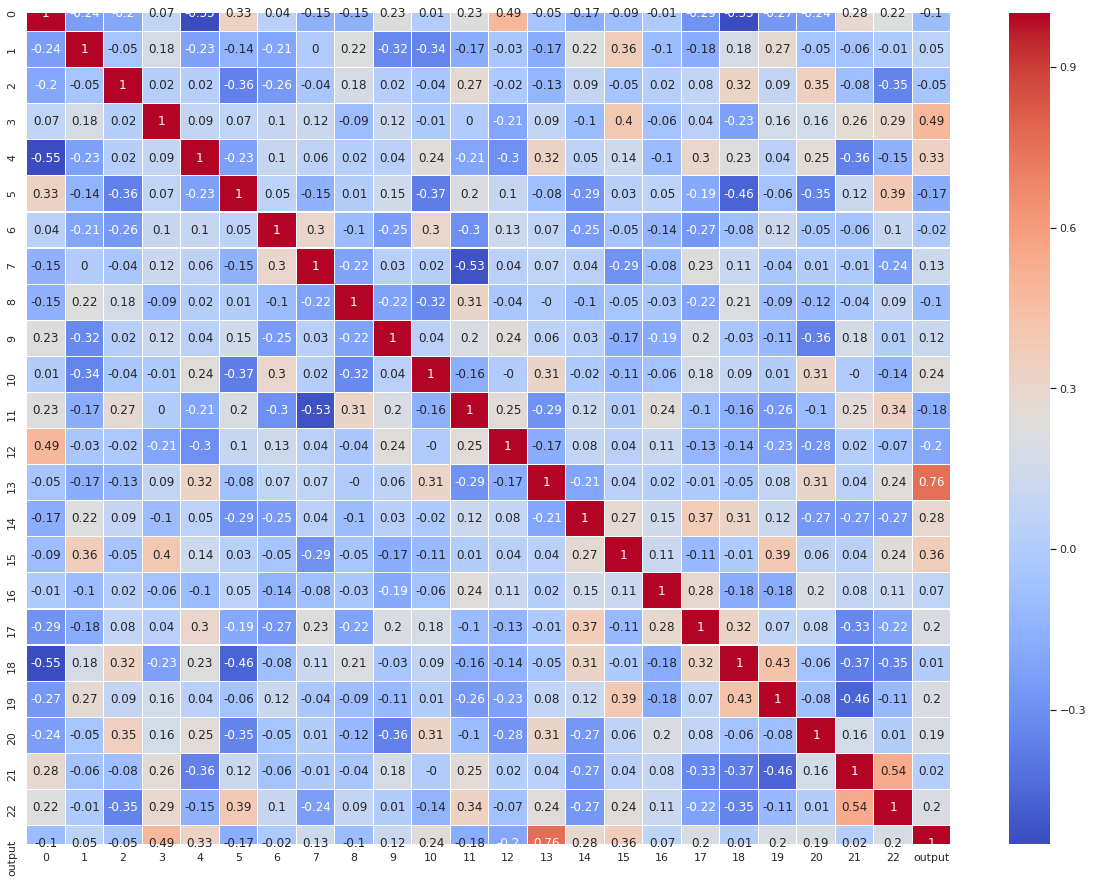

In [4]:
print(coef)

correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=.2, annot=True)

In [36]:
error = np.random.rand()
error_corr = 0.01 * error

group1 = np.ones((30,9))
group2 = np.ones((30,9))
group3 = np.ones((30,9))

for row in range(group1.shape[0]):
    for column in range(group1.shape[1]):
        group1[row][column] *= X[row][1]
        group1[row][column] += error_corr
        
for row in range(group2.shape[0]):
    for column in range(group2.shape[1]):
        group2[row][column] *= X[row][21]
        group2[row][column] += error_corr
        
for row in range(group3.shape[0]):
    for column in range(group3.shape[1]):
        group3[row][column] *= X[row][22]
        group3[row][column] += error_corr

print(group1.shape)
X_data = np.insert(X, [2], group1, axis=1)
X_data = np.insert(X_data, [31], group2, axis=1)
X_data = np.insert(X_data, [41], group3, axis=1)

print(X_data.shape)

(30, 9)
(30, 50)


In [37]:
df = pd.DataFrame(X_data)
df['output'] = y
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,output
10,0.471169,-1.412528,-1.408927,-1.408927,-1.408927,-1.408927,-1.408927,-1.408927,-1.408927,-1.408927,...,-1.602889,-1.602889,-1.602889,-1.602889,-1.602889,-1.602889,-1.602889,-1.602889,-1.602889,-57.268408
5,-0.459763,0.695216,0.698817,0.698817,0.698817,0.698817,0.698817,0.698817,0.698817,0.698817,...,0.698357,0.698357,0.698357,0.698357,0.698357,0.698357,0.698357,0.698357,0.698357,84.002728
7,-0.877255,-1.297268,-1.293667,-1.293667,-1.293667,-1.293667,-1.293667,-1.293667,-1.293667,-1.293667,...,1.594859,1.594859,1.594859,1.594859,1.594859,1.594859,1.594859,1.594859,1.594859,-16.658180
17,-1.799844,-1.192411,-1.188810,-1.188810,-1.188810,-1.188810,-1.188810,-1.188810,-1.188810,-1.188810,...,-0.162713,-0.162713,-0.162713,-0.162713,-0.162713,-0.162713,-0.162713,-0.162713,-0.162713,-57.613401
12,0.184464,-0.177868,-0.174267,-0.174267,-0.174267,-0.174267,-0.174267,-0.174267,-0.174267,-0.174267,...,0.802558,0.802558,0.802558,0.802558,0.802558,0.802558,0.802558,0.802558,0.802558,-104.103787
20,0.927818,0.357742,0.361343,0.361343,0.361343,0.361343,0.361343,0.361343,0.361343,0.361343,...,0.098583,0.098583,0.098583,0.098583,0.098583,0.098583,0.098583,0.098583,0.098583,-26.566220
0,-1.329697,-0.792378,-0.788777,-0.788777,-0.788777,-0.788777,-0.788777,-0.788777,-0.788777,-0.788777,...,0.887756,0.887756,0.887756,0.887756,0.887756,0.887756,0.887756,0.887756,0.887756,-57.309317
19,1.329066,-0.146959,-0.143358,-0.143358,-0.143358,-0.143358,-0.143358,-0.143358,-0.143358,-0.143358,...,-0.808927,-0.808927,-0.808927,-0.808927,-0.808927,-0.808927,-0.808927,-0.808927,-0.808927,-105.264031
1,-0.339002,-1.080984,-1.077384,-1.077384,-1.077384,-1.077384,-1.077384,-1.077384,-1.077384,-1.077384,...,0.158455,0.158455,0.158455,0.158455,0.158455,0.158455,0.158455,0.158455,0.158455,-66.947796
8,-1.790692,-0.232293,-0.228692,-0.228692,-0.228692,-0.228692,-0.228692,-0.228692,-0.228692,-0.228692,...,-0.663957,-0.663957,-0.663957,-0.663957,-0.663957,-0.663957,-0.663957,-0.663957,-0.663957,-69.576202


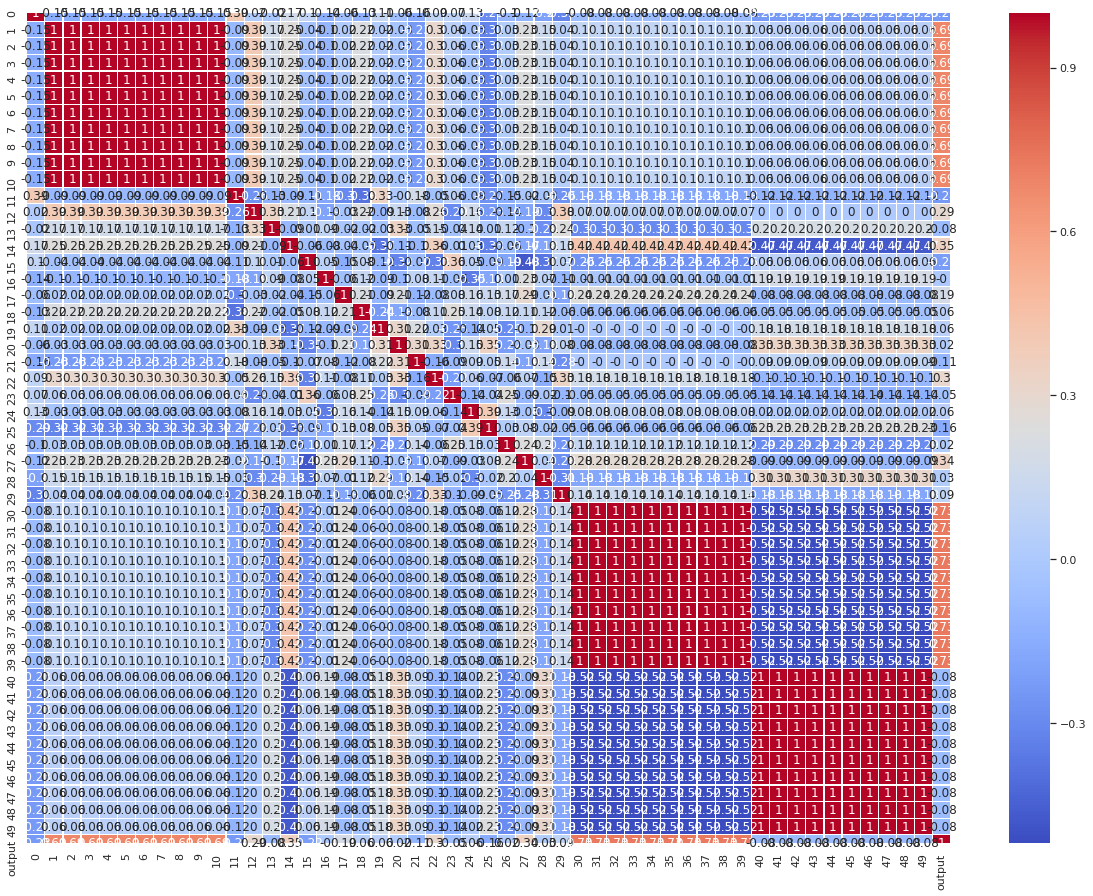

In [38]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=.2, annot=True)

In [50]:
mu = 0
#taus = np.logspace(-1,-4,5)
taus = np.linspace(0.1,0.5,10)

#alphas = []
#l1_ratios = []

#for tau in taus:
 #   alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
  #  alphas.append(alpha)
   # l1_ratios.append(l1_ratio)

alphas = np.linspace(1,100,50)   
print(alphas)
#print(l1_ratios)


tuned_parameters = [{'alpha': alphas}]

enet = ElasticNet(max_iter = 10000, l1_ratio=1, fit_intercept=True)

scores = []
coefs_found = []
best_params = []

K = 3
kf = KFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data)
for train_index, test_index in kf.split(X_data):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))
print(max_score_index)
print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

print("Performace")
print(scores[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

#max_score_index

[  1.           3.02040816   5.04081633   7.06122449   9.08163265
  11.10204082  13.12244898  15.14285714  17.16326531  19.18367347
  21.20408163  23.2244898   25.24489796  27.26530612  29.28571429
  31.30612245  33.32653061  35.34693878  37.36734694  39.3877551
  41.40816327  43.42857143  45.44897959  47.46938776  49.48979592
  51.51020408  53.53061224  55.55102041  57.57142857  59.59183673
  61.6122449   63.63265306  65.65306122  67.67346939  69.69387755
  71.71428571  73.73469388  75.75510204  77.7755102   79.79591837
  81.81632653  83.83673469  85.85714286  87.87755102  89.89795918
  91.91836735  93.93877551  95.95918367  97.97959184 100.        ]
[-0.00000000e+00  5.12311768e+01  2.06441280e-13  5.10993268e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+0

In [3]:
from Symbolic_regression_classification_generator import gen_regression_symbolic, gen_classification_symbolic

In [28]:
f = 'x1+x2+x3+0*x4+(x5)+(x6)+(x7)+(x8)+(x9)+(x10)+(x11)+(x12)+(x13)+(x14)+(x15)+(x16)+(x17)+(x18)+(x19)+(x20)+(x21)+(x22)+(x23)'

In [29]:
data9 = gen_classification_symbolic(m=f,n_samples=30,n_features=23,flip_y=0.01)
#df9=pd.DataFrame(data9, columns=['x'+str(i) for i in range(1,23)]+['y'])

In [32]:
print(data9.shape)
df9=pd.DataFrame(data9, columns=['x'+str(i) for i in range(1,23)]+['y'])
df9.sample(10)

(30, 23)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
21,-0.332762,-5.059071,-7.303303,-2.324671,-5.016206,0.442965,-0.169331,-8.674912,6.944885,-0.446178,...,1.919061,6.675535,-10.885679,-2.852633,-3.146349,-5.004869,-7.479449,-2.194505,-3.057360,0.0
27,-1.143617,5.123206,-7.190920,3.952288,0.944670,0.873010,1.709172,2.572114,-3.583770,10.209700,...,-4.467995,2.168637,1.505065,1.496895,-1.205988,6.150967,-1.517142,-7.263970,5.404389,1.0
25,-9.798073,-8.314857,-10.425938,5.768963,1.880260,8.341955,3.834588,-0.646106,-1.530178,-2.567228,...,4.612706,-5.949549,1.296905,-1.869641,-4.211275,14.724976,1.763293,-1.626304,5.229639,0.0
11,-0.063286,-7.055857,4.797595,1.293125,-4.982178,1.329742,-3.240171,0.063088,4.748409,0.173602,...,-3.986350,10.511926,0.284265,-7.849330,-0.876064,-3.511436,-1.142263,-9.536758,-5.743669,0.0
0,0.165147,0.775445,-6.548541,-8.724836,3.856490,2.283972,4.208626,-7.176151,-2.803780,-3.291677,...,-7.489244,3.747467,-3.736034,-4.795157,10.261701,-3.179737,-0.824524,1.042987,-13.107788,0.0
1,-2.237180,-1.519251,-1.089126,1.182979,-4.763382,0.178053,-1.226828,-0.406926,5.479140,8.067919,...,3.827693,4.048040,-4.202825,5.345002,5.811171,-5.172460,1.453989,4.943261,-0.277763,1.0
10,-5.223260,-0.472225,0.279029,-1.971230,4.969279,5.129812,3.303824,2.056705,-3.228166,-2.341140,...,2.622145,2.725082,2.523632,1.143911,6.921978,-1.600764,-3.399038,-0.701960,-3.660770,1.0
29,5.466247,2.959056,4.403755,-5.666682,6.456524,-1.371715,-6.488212,7.193674,-4.762128,8.496476,...,1.490414,1.206050,-9.251032,-10.167249,3.278585,-5.945368,-1.832528,4.960978,3.288036,1.0
26,4.939937,-9.613476,2.260431,-6.732793,-0.734465,1.935557,5.129314,6.154540,-1.581064,-8.658875,...,5.487644,-6.048373,-3.846914,0.133040,1.443073,6.261613,-2.399451,3.878145,2.963721,1.0
19,8.192981,5.535496,4.681492,-5.844583,-7.030944,-5.586662,-5.518826,2.470053,-5.112481,-2.820594,...,-2.398916,6.115428,1.634798,-8.017235,-3.982837,-0.044628,-6.758340,-3.911003,8.374153,0.0
